 FISTA: 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 7.625 dB 

2 	 Error: 4.1177e-01 	 PSNR: 15.344 dB 

3 	 Error: 2.6978e-01 	 PSNR: 19.580 dB 

4 	 Error: 1.7459e-01 	 PSNR: 21.662 dB 

5 	 Error: 1.0672e-01 	 PSNR: 22.513 dB 

6 	 Error: 5.7913e-02 	 PSNR: 22.804 dB 

7 	 Error: 2.4159e-02 	 PSNR: 22.851 dB 

8 	 Error: 3.4520e-03 	 PSNR: 22.784 dB 

9 	 Error: 8.5605e-03 	 PSNR: 22.675 dB 

10 	 Error: 1.1876e-02 	 PSNR: 22.578 dB 

11 	 Error: 1.0417e-02 	 PSNR: 22.523 dB 

12 	 Error: 6.8645e-03 	 PSNR: 22.518 dB 

13 	 Error: 3.5904e-03 	 PSNR: 22.552 dB 

14 	 Error: 2.7493e-03 	 PSNR: 22.607 dB 

15 	 Error: 3.4240e-03 	 PSNR: 22.667 dB 

16 	 Error: 3.6637e-03 	 PSNR: 22.721 dB 

17 	 Error: 3.4501e-03 	 PSNR: 22.768 dB 

18 	 Error: 3.1918e-03 	 PSNR: 22.806 dB 

19 	 Error: 3.1334e-03 	 PSNR: 22.840 dB 

20 	 Error: 3.2281e-03 	 PSNR: 22.871 dB 

21 	 Error: 3.3386e-03 	 PSNR: 22.905 dB 

22 	 Error: 3.4153e-03 	 PSNR: 22.943 dB 

23 	 Error: 3.4761e-03 	 PSN

Text(0.5, 1.0, 'Convergence')

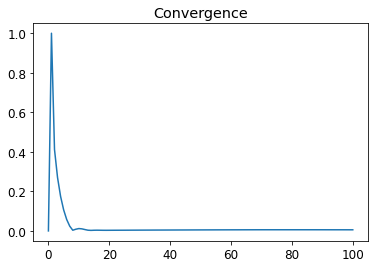

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os

from Function import *
import scipy
#----------------- --------------------
x = np.load('data/data.npy')
maxiter = 100

# Select the Algorithm
# opt: FISTA, GAP, TWIST, ADMM
case = 'FISTA' 


#----------------- FISTA --------------------
# if case == 'FISTA':
H = 0.75
Alg = Algorithms(x,H , 'DCT2D', 'IDCT2D')

tau = 0.1
mu = 0.3
x_result, hist = Alg.FISTA(tau, mu,maxiter)

plt.plot(hist[:,0])
plt.title('Convergence')

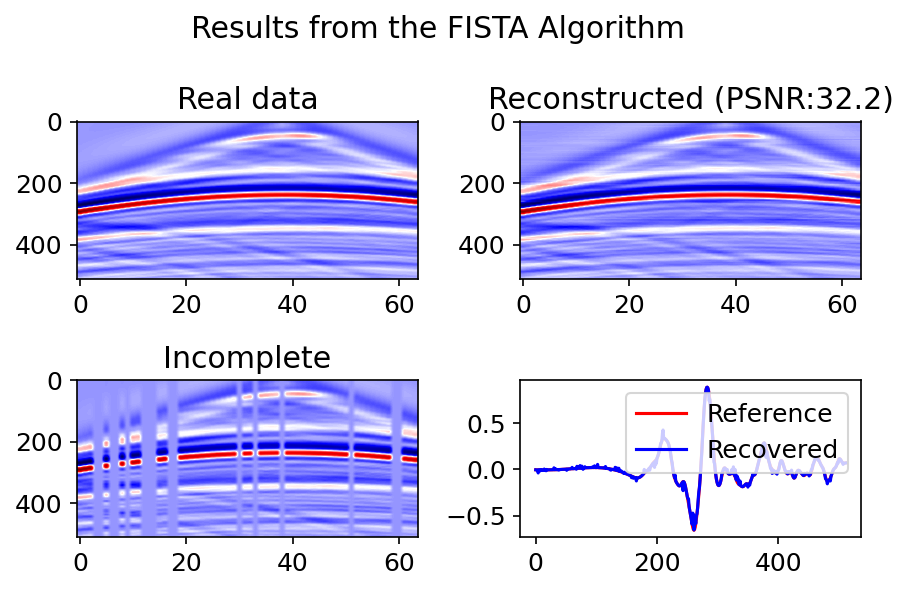

In [59]:
#-------------- Visualization ----------------
x = Alg.x
cort = Alg.cort

fig, axs = plt.subplots(2, 2,dpi=150)
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x.T, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')

y_gor = x.copy()
y_gor[cort,:]= 0
axs[1, 0].imshow(y_gor.T, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')

axs[1, 0].sharex(axs[0, 0])

axs[0, 1].imshow(x_result.T, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed (PSNR:' + str("{:.1f})".format(hist[maxiter,1])))

axs[1, 1].plot(x [cort [1], :], 'r', label='Reference')
axs[1, 1].plot(x_result [cort [1], :], 'b', label='Recovered')
axs[1, 1].legend(loc='best')

fig.tight_layout()


---------GAP method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 22.422 dB 

2 	 Error: 7.4405e-03 	 PSNR: 22.489 dB 

3 	 Error: 6.6422e-03 	 PSNR: 22.558 dB 

4 	 Error: 6.1725e-03 	 PSNR: 22.623 dB 

5 	 Error: 5.8581e-03 	 PSNR: 22.689 dB 

6 	 Error: 5.6190e-03 	 PSNR: 22.755 dB 

7 	 Error: 5.4272e-03 	 PSNR: 22.819 dB 

8 	 Error: 5.2699e-03 	 PSNR: 22.884 dB 

9 	 Error: 5.1372e-03 	 PSNR: 22.949 dB 

10 	 Error: 5.0237e-03 	 PSNR: 23.015 dB 

11 	 Error: 4.9235e-03 	 PSNR: 23.080 dB 

12 	 Error: 4.8340e-03 	 PSNR: 23.143 dB 

13 	 Error: 4.7502e-03 	 PSNR: 23.208 dB 

14 	 Error: 4.6702e-03 	 PSNR: 23.274 dB 

15 	 Error: 4.5920e-03 	 PSNR: 23.339 dB 

16 	 Error: 4.5211e-03 	 PSNR: 23.403 dB 

17 	 Error: 4.4580e-03 	 PSNR: 23.468 dB 

18 	 Error: 4.4007e-03 	 PSNR: 23.533 dB 

19 	 Error: 4.3448e-03 	 PSNR: 23.597 dB 

20 	 Error: 4.2861e-03 	 PSNR: 23.662 dB 

21 	 Error: 4.2285e-03 	 PSNR: 23.727 dB 

22 	 Error: 4.1704e-03 	 PSNR: 23.792 dB 

23 	 

Text(0.5, 1.0, 'Convergence')

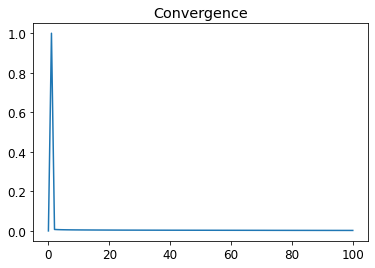

In [60]:
case = 'GAP' 
x = np.load('data/data.npy')

# ------------------GAP--------------
# if case == 'GAP':
H = 0.75
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
tau = 1e-0
x_result, hist = Alg.GAP(tau, maxiter) # inputs: tau, maxiter

plt.plot(hist[:,0])
plt.title('Convergence')



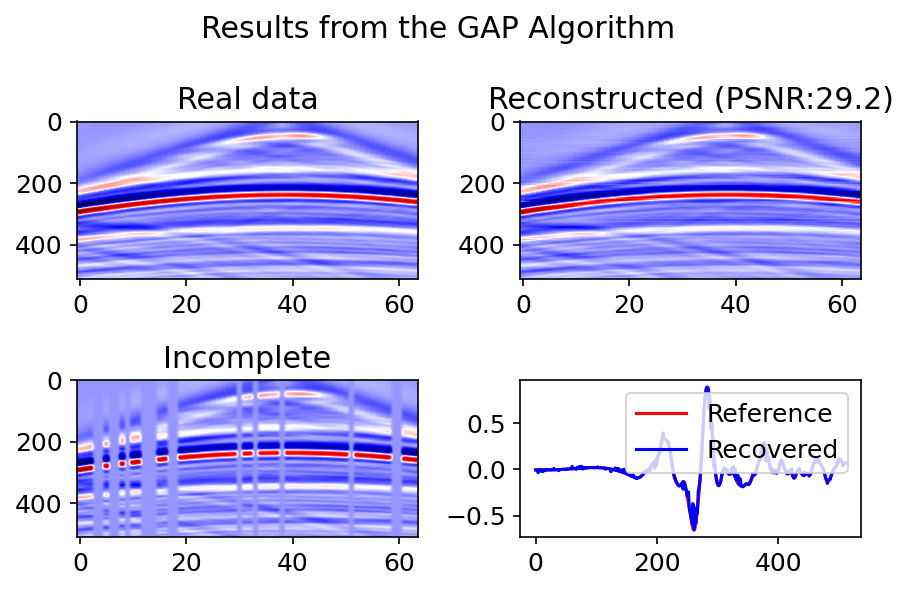

In [61]:
#-------------- Visualization ----------------
x = Alg.x
cort = Alg.cort

fig, axs = plt.subplots(2, 2,dpi=150)
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x.T, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')

y_gor = x.copy()
y_gor[cort,:]= 0
axs[1, 0].imshow(y_gor.T, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')

axs[1, 0].sharex(axs[0, 0])

axs[0, 1].imshow(x_result.T, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed (PSNR:' + str("{:.1f})".format(hist[maxiter,1])))

axs[1, 1].plot(x [cort [1], :], 'r', label='Reference')
axs[1, 1].plot(x_result [cort [1], :], 'b', label='Recovered')
axs[1, 1].legend(loc='best')

fig.tight_layout()

---------TwIST method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 21.959 dB 

2 	 Error: 3.9464e+00 	 PSNR: 11.079 dB 

3 	 Error: 6.8369e-01 	 PSNR: 23.688 dB 

4 	 Error: 4.1993e-01 	 PSNR: 21.605 dB 

5 	 Error: 1.2373e-01 	 PSNR: 22.993 dB 

6 	 Error: 2.6575e-02 	 PSNR: 22.862 dB 

7 	 Error: 8.3729e-03 	 PSNR: 22.897 dB 

8 	 Error: 1.1065e-02 	 PSNR: 23.059 dB 

9 	 Error: 8.8682e-03 	 PSNR: 23.086 dB 

10 	 Error: 6.8907e-03 	 PSNR: 23.192 dB 

11 	 Error: 6.1324e-03 	 PSNR: 23.261 dB 

12 	 Error: 5.8781e-03 	 PSNR: 23.349 dB 

13 	 Error: 5.7378e-03 	 PSNR: 23.427 dB 

14 	 Error: 5.6203e-03 	 PSNR: 23.507 dB 

15 	 Error: 5.5208e-03 	 PSNR: 23.589 dB 

16 	 Error: 5.4366e-03 	 PSNR: 23.667 dB 

17 	 Error: 5.3474e-03 	 PSNR: 23.748 dB 

18 	 Error: 5.2513e-03 	 PSNR: 23.830 dB 

19 	 Error: 5.1667e-03 	 PSNR: 23.911 dB 

20 	 Error: 5.0877e-03 	 PSNR: 23.992 dB 

21 	 Error: 5.0250e-03 	 PSNR: 24.072 dB 

22 	 Error: 4.9679e-03 	 PSNR: 24.154 dB 

23 

Text(0.5, 1.0, 'Convergence')

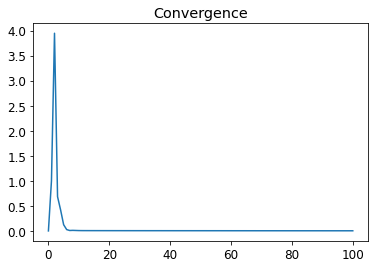

In [62]:
case = 'TWIST' 
x = np.load('data/data.npy')

# ------------------TwIST--------------
# if case == 'TWIST':
H = 0.75
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
# default parameters
alpha = 1.2
beta  = 1.998
tau = 0.5

x_result, hist = Alg.TwIST(tau, alpha, beta, maxiter)

plt.plot(hist[:,0])
plt.title('Convergence')


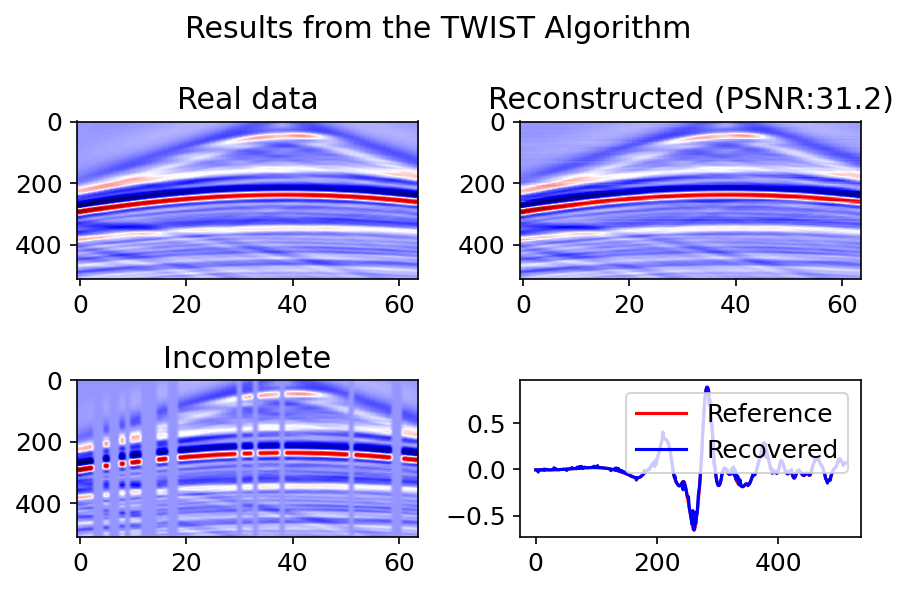

In [63]:
#-------------- Visualization ----------------
x = Alg.x
cort = Alg.cort

fig, axs = plt.subplots(2, 2,dpi=150)
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x.T, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')

y_gor = x.copy()
y_gor[cort,:]= 0
axs[1, 0].imshow(y_gor.T, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')

axs[1, 0].sharex(axs[0, 0])

axs[0, 1].imshow(x_result.T, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed (PSNR:' + str("{:.1f})".format(hist[maxiter,1])))

axs[1, 1].plot(x [cort [1], :], 'r', label='Reference')
axs[1, 1].plot(x_result [cort [1], :], 'b', label='Recovered')
axs[1, 1].legend(loc='best')

fig.tight_layout()

In [64]:
case = 'ADMM' 
x = np.load('data/data.npy')

# --------------- ADMM -----------------
# if case == 'ADMM':
H = 0.75
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')

rho = 0.5
gamma = 1
lamnda = 0.0078

x_result, hist = Alg.ADMM(rho, gamma, lamnda, maxiter)
# --------------------------------
plt.plot(hist[:,0])
plt.title('Convergence')


---------ADMM method---------- 

itr 	 ||x-xold|| 	 PSNR 



TypeError: type not understood

In [ ]:
#-------------- Visualization ----------------
x = Alg.x
cort = Alg.cort

fig, axs = plt.subplots(2, 2,dpi=150)
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x.T, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')

y_gor = x.copy()
y_gor[cort,:]= 0
axs[1, 0].imshow(y_gor.T, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')

axs[1, 0].sharex(axs[0, 0])

axs[0, 1].imshow(x_result.T, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed (PSNR:' + str("{:.1f})".format(hist[maxiter,1])))

axs[1, 1].plot(x [cort [1], :], 'r', label='Reference')
axs[1, 1].plot(x_result [cort [1], :], 'b', label='Recovered')
axs[1, 1].legend(loc='best')

fig.tight_layout()